In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
def toRGB(img):
    """Return RGB image"""
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [3]:
img_path = '../../data/raw/jpg/IMG_20170617_163840.jpg'

In [4]:
img = cv2.imread(img_path)

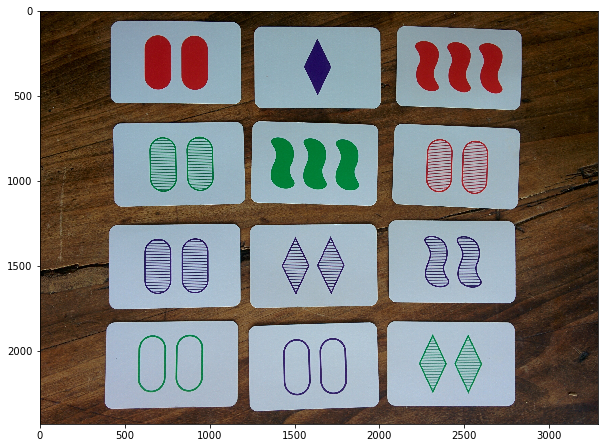

In [10]:
fig = plt.figure(figsize=(10, 12))
plt.imshow(toRGB(img));

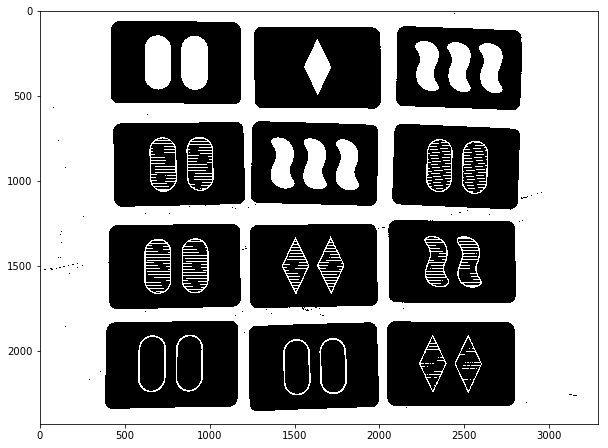

In [11]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 0, 1, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
fig = plt.figure(figsize=(10, 12))
plt.imshow(thresh, cmap=plt.cm.gray);
#plt.imshow(gray, cmap=plt.cm.gray);

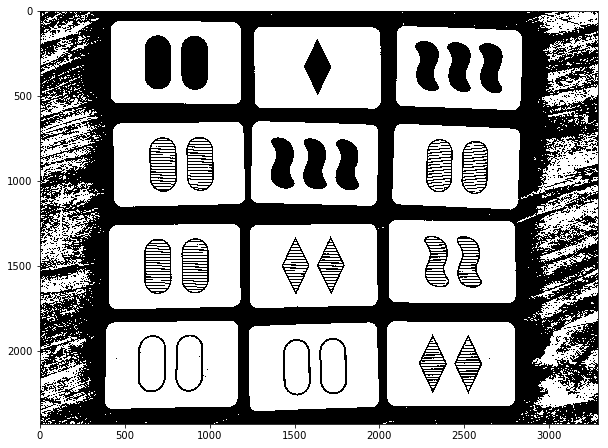

In [25]:
adapt_thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 355, 0)
fig = plt.figure(figsize=(10, 12))
plt.imshow(adapt_thresh, cmap=plt.cm.gray);
#plt.imshow(gray, cmap=plt.cm.gray);

In [7]:
np.min(gray)

0

### image manipulation with scipy and numpy

In [64]:
from scipy.misc import imread

In [65]:
cards_colour = imread(img_path, flatten=False)
cards = imread(img_path, flatten=True)

In [66]:
cards_colour.shape

(3264, 2448, 3)

In [67]:
cards_colour.dtype

dtype('uint8')

In [68]:
cards_colour[1000, 1000, :]

array([170, 180, 181], dtype=uint8)

In [69]:
cards_colour[1000, 1000, :].mean()

177.0

In [70]:
cards.shape

(3264, 2448)

In [71]:
cards[1000, 1000]

177.12399

In [72]:
cards.dtype

dtype('float32')

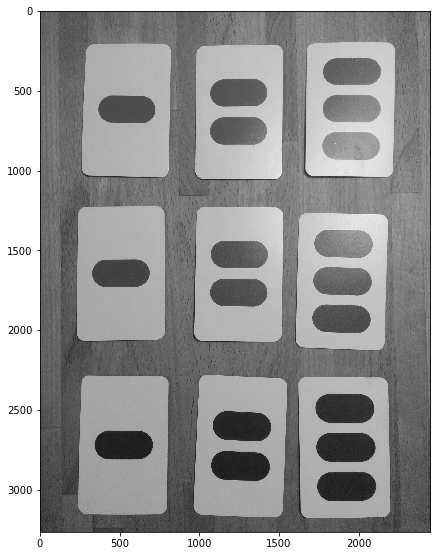

In [73]:
plt.figure(figsize=(7, 15))
plt.imshow(cards, cmap=plt.cm.gray)

In [74]:
# collapse rows and columns
mean_row = cards.mean(axis=0)
mean_col = cards.mean(axis=1)

### mean row

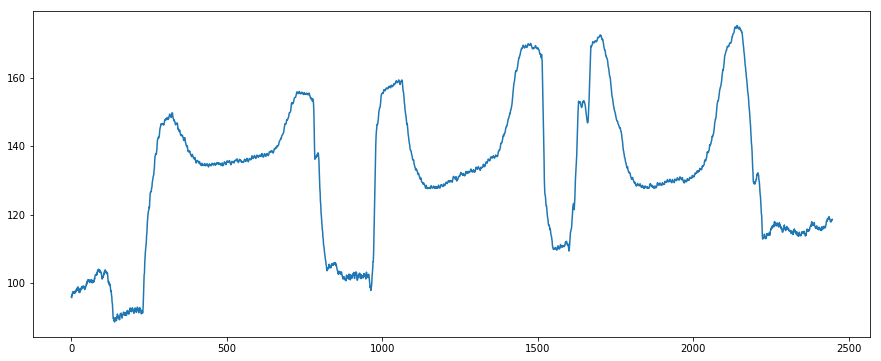

In [75]:
# plot mean row
plt.figure(figsize=(15, 6))
plt.plot(mean_row);

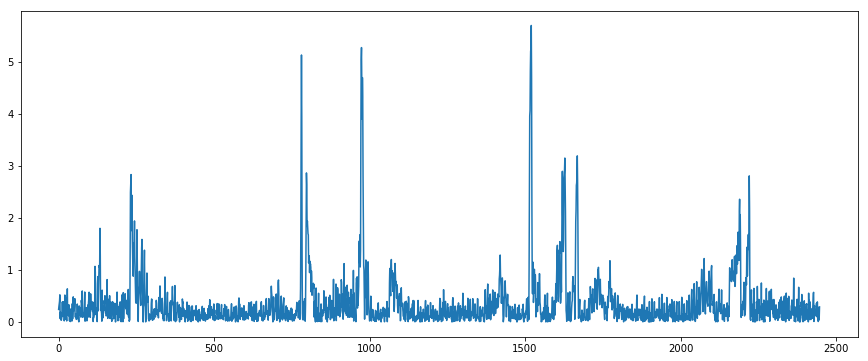

In [76]:
# abs derivative mean row
plt.figure(figsize=(15, 6))
plt.plot(np.abs(np.gradient(mean_row)));

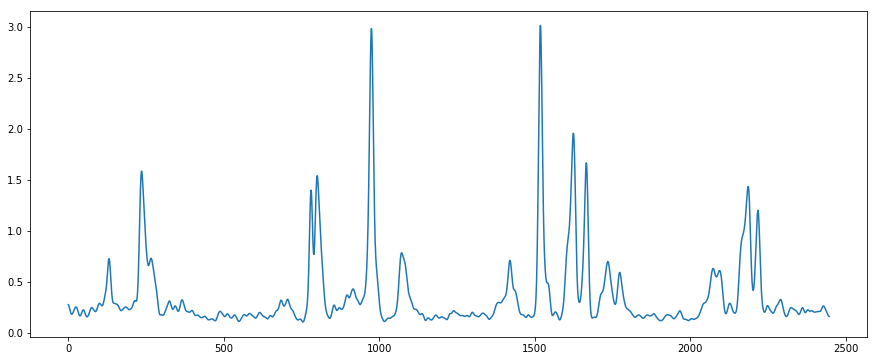

In [77]:
# smooth abs derivative mean row
from scipy.ndimage.filters import gaussian_filter1d
plt.figure(figsize=(15, 6))
plt.plot(gaussian_filter1d(np.abs(np.gradient(mean_row)), 5));

### mean column

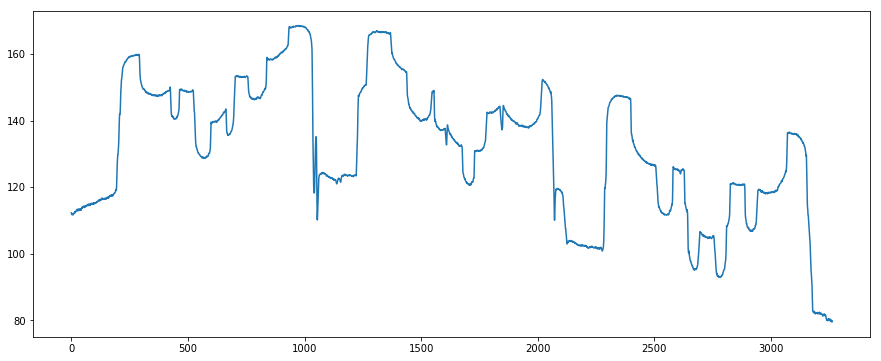

In [78]:
plt.figure(figsize=(15, 6))
plt.plot(mean_col);

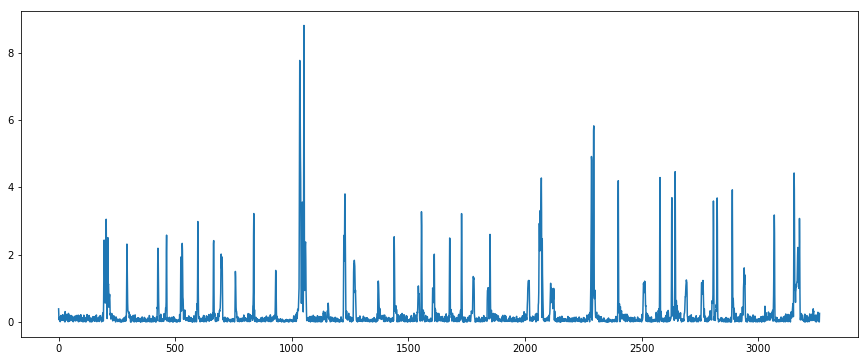

In [79]:
# abs derivative mean column
plt.figure(figsize=(15, 6))
plt.plot(np.abs(np.gradient(mean_col)));

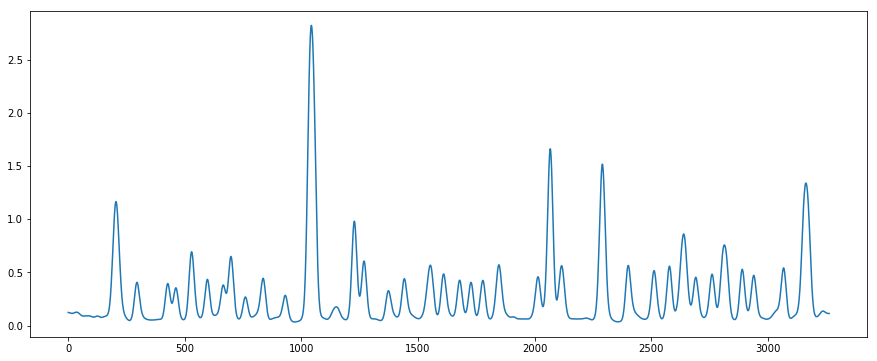

In [80]:
# smooth abs derivative mean col
from scipy.ndimage.filters import gaussian_filter1d
plt.figure(figsize=(15, 6))
plt.plot(gaussian_filter1d(np.abs(np.gradient(mean_col)), 10));

### idem with thresh

In [81]:
# collapse rows and columns
thresh_mean_row = thresh.mean(axis=0)
thresh_mean_col = thresh.mean(axis=1)

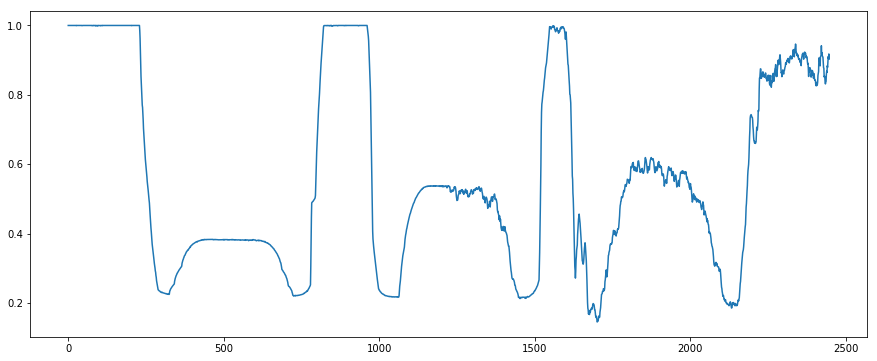

In [82]:
# plot mean row
plt.figure(figsize=(15, 6))
plt.plot(thresh_mean_row);

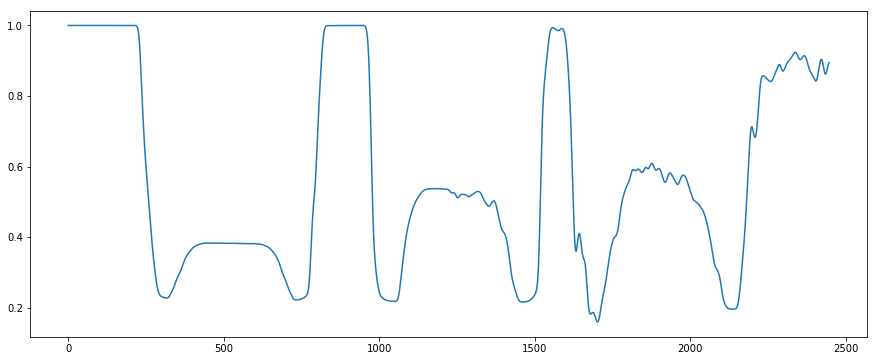

In [87]:
# plot mean row
plt.figure(figsize=(15, 6))
plt.plot(gaussian_filter1d(thresh_mean_row, 5));

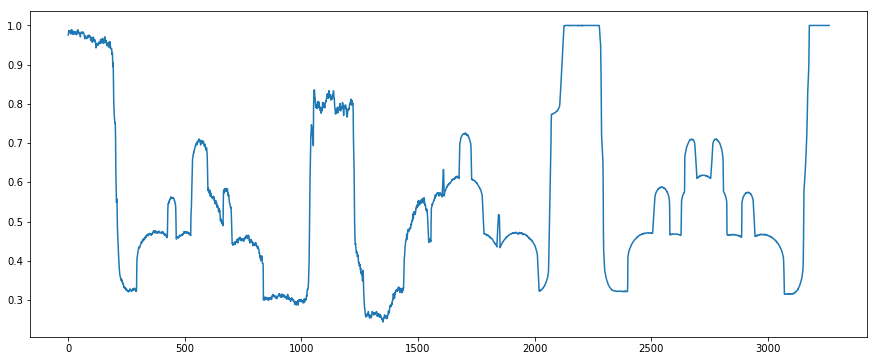

In [83]:
# plot mean col
plt.figure(figsize=(15, 6))
plt.plot(thresh_mean_col);

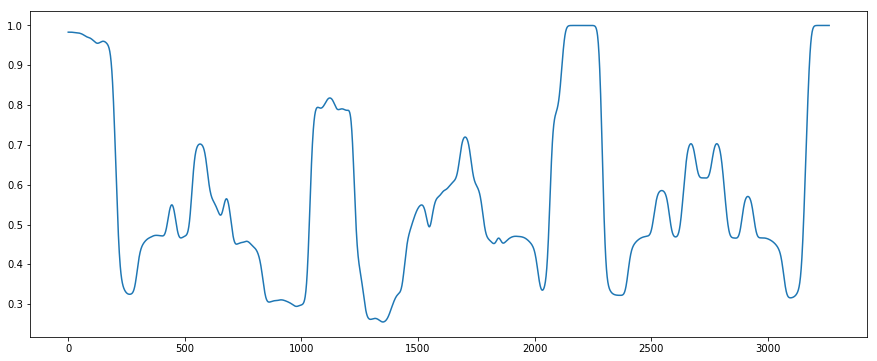

In [89]:
# plot mean col
plt.figure(figsize=(15, 6))
plt.plot(gaussian_filter1d(thresh_mean_col, 10));

In [26]:
a = np.array([0, 0, 1, 1, 1, 0])

In [27]:
a[1:]

array([0, 1, 1, 1, 0])

In [28]:
a[:-1]

array([0, 0, 1, 1, 1])

In [33]:
flips = np.argwhere(np.logical_xor(a[1:], a[:-1]))
flips

array([[1],
       [4]])

In [34]:
a[flips]

array([[0],
       [1]])